<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r12_i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r12/4-fft-normal-n-0-6-9-15-r12.csv?token=AKVFSOCX5P6QSLFGG775WZC64IE6S')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r12/4-fft-malicious-n-0-6-9-15-m-1-11-r12.csv?token=AKVFSOBLWLJNAN4GASGRCZS64IE6Y')


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,114,3,2,1,1,4,3,9,15,15,24,8,6,4,3,0.75,16,1,1,1,1,6,24,3,27,1
1,136,3,2,1,1,4,3,9,15,15,24,8,9,4,3,0.75,16,1,1,1,1,6,36,3,27,0
2,1122,0,3,1,1,4,3,9,6,6,28,12,66,4,4,1.00,20,20,1,20,20,0,264,3,27,0
3,1123,0,3,1,1,4,3,9,6,6,28,12,46,4,4,1.00,20,14,1,14,14,0,184,3,27,1
4,1130,2,0,2,1,4,3,9,28,12,27,11,66,4,0,0.00,4,19,2,20,38,0,528,6,54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51541,3277578,2,0,6,4,2,3,10,28,12,27,11,60201,4,0,0.00,25,5,10,14,50,0,2889648,18,180,0
51542,3277585,2,0,6,5,3,3,10,28,12,27,11,60201,4,0,0.00,32,4,11,14,44,0,5418090,18,180,0
51543,3277586,2,0,2,1,4,3,11,28,12,27,11,60202,4,0,0.00,32,3,12,14,36,0,481616,6,66,0
51544,3277587,2,0,7,1,4,3,12,28,12,15,15,60201,3,0,0.00,5,2,13,14,26,0,1685628,21,252,0


In [6]:
df.shape

(51546, 26)

Test Data

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r12/4-fft-malicious-n-0-6-9-15-m-1-12-r12.csv?token=AKVFSOEZ6DTXKHPQ5QU2DV264IE66')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r12/4-fft-malicious-n-0-6-9-15-m-1-7-r12.csv?token=AKVFSOG5Y74EOXY6IR5YLBS64IE7C')
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r12/4-fft-malicious-n-0-6-9-15-m-11-12-r12.csv?token=AKVFSOG5ETKKLOKQGIC57UK64IE7G')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r12/4-fft-malicious-n-0-6-9-15-m-7-11-r12.csv?token=AKVFSOBTH4ZO5PWKGDY46GS64IE7K')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r12/4-fft-malicious-n-0-6-9-15-m-7-12-r12.csv?token=AKVFSOCNXJ4POVY3RMLEBO264IE7Q')

In [8]:
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(89975, 26)
(29749, 26)
(89919, 26)
(29713, 26)
(89939, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.563869,0.252421,-0.003267,0.004641,NaN,0.208635,-0.057104,0.577900,-0.438854,-0.656865,-0.211748,-0.232406,0.006932,-0.169873,-0.120738,0.687365,0.033196,0.252421,0.284112,0.060801
inport,-0.563869,1.000000,-0.375104,-0.010923,0.015518,NaN,-0.608808,-0.021609,-0.083087,0.927728,0.966929,0.439461,0.126526,-0.188071,-0.046368,-0.056279,0.191981,-0.120986,-0.375104,-0.519778,0.006102
cache_coherence_type,0.252421,-0.375104,1.000000,0.335834,-0.477093,NaN,0.066498,0.038328,0.003572,-0.386291,-0.396111,-0.535915,0.024323,-0.001786,0.016980,0.020972,-0.037777,0.340407,1.000000,0.952891,-0.003245
flit_id,-0.003267,-0.010923,0.335834,1.000000,-0.166391,NaN,-0.073184,0.017789,-0.001033,-0.007329,0.012562,0.503791,0.034047,-0.011670,0.016859,0.033295,0.003732,0.706560,0.335834,0.293267,0.000321
flit_type,0.004641,0.015518,-0.477093,-0.166391,1.000000,NaN,0.103967,-0.025271,0.001468,0.010412,-0.017846,0.320788,-0.182879,0.154737,-0.021202,-0.025106,-0.005302,0.027079,-0.477093,-0.416622,-0.000455
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.208635,-0.608808,0.066498,-0.073184,0.103967,NaN,1.000000,0.040993,-0.070664,-0.608332,-0.587924,-0.202704,-0.039713,0.178304,0.104415,0.105801,-0.298308,0.031421,0.066498,0.356039,-0.043251
traversal_id,-0.057104,-0.021609,0.038328,0.017789,-0.025271,NaN,0.040993,1.000000,-0.035265,-0.018157,-0.010704,0.018374,0.202463,0.203098,0.305549,0.247296,-0.089044,0.505683,0.038328,0.046447,-0.355939
hop_count,0.577900,-0.083087,0.003572,-0.001033,0.001468,NaN,-0.070664,-0.035265,1.000000,0.170518,-0.214306,0.075597,-0.135313,-0.065786,-0.151508,-0.123883,0.611019,-0.015881,0.003572,-0.023428,-0.045066
current_hop,-0.438854,0.927728,-0.386291,-0.007329,0.010412,NaN,-0.608332,-0.018157,0.170518,1.000000,0.913574,0.474015,0.095937,-0.196445,-0.075723,-0.088300,0.296111,-0.119719,-0.386291,-0.528935,-0.022079


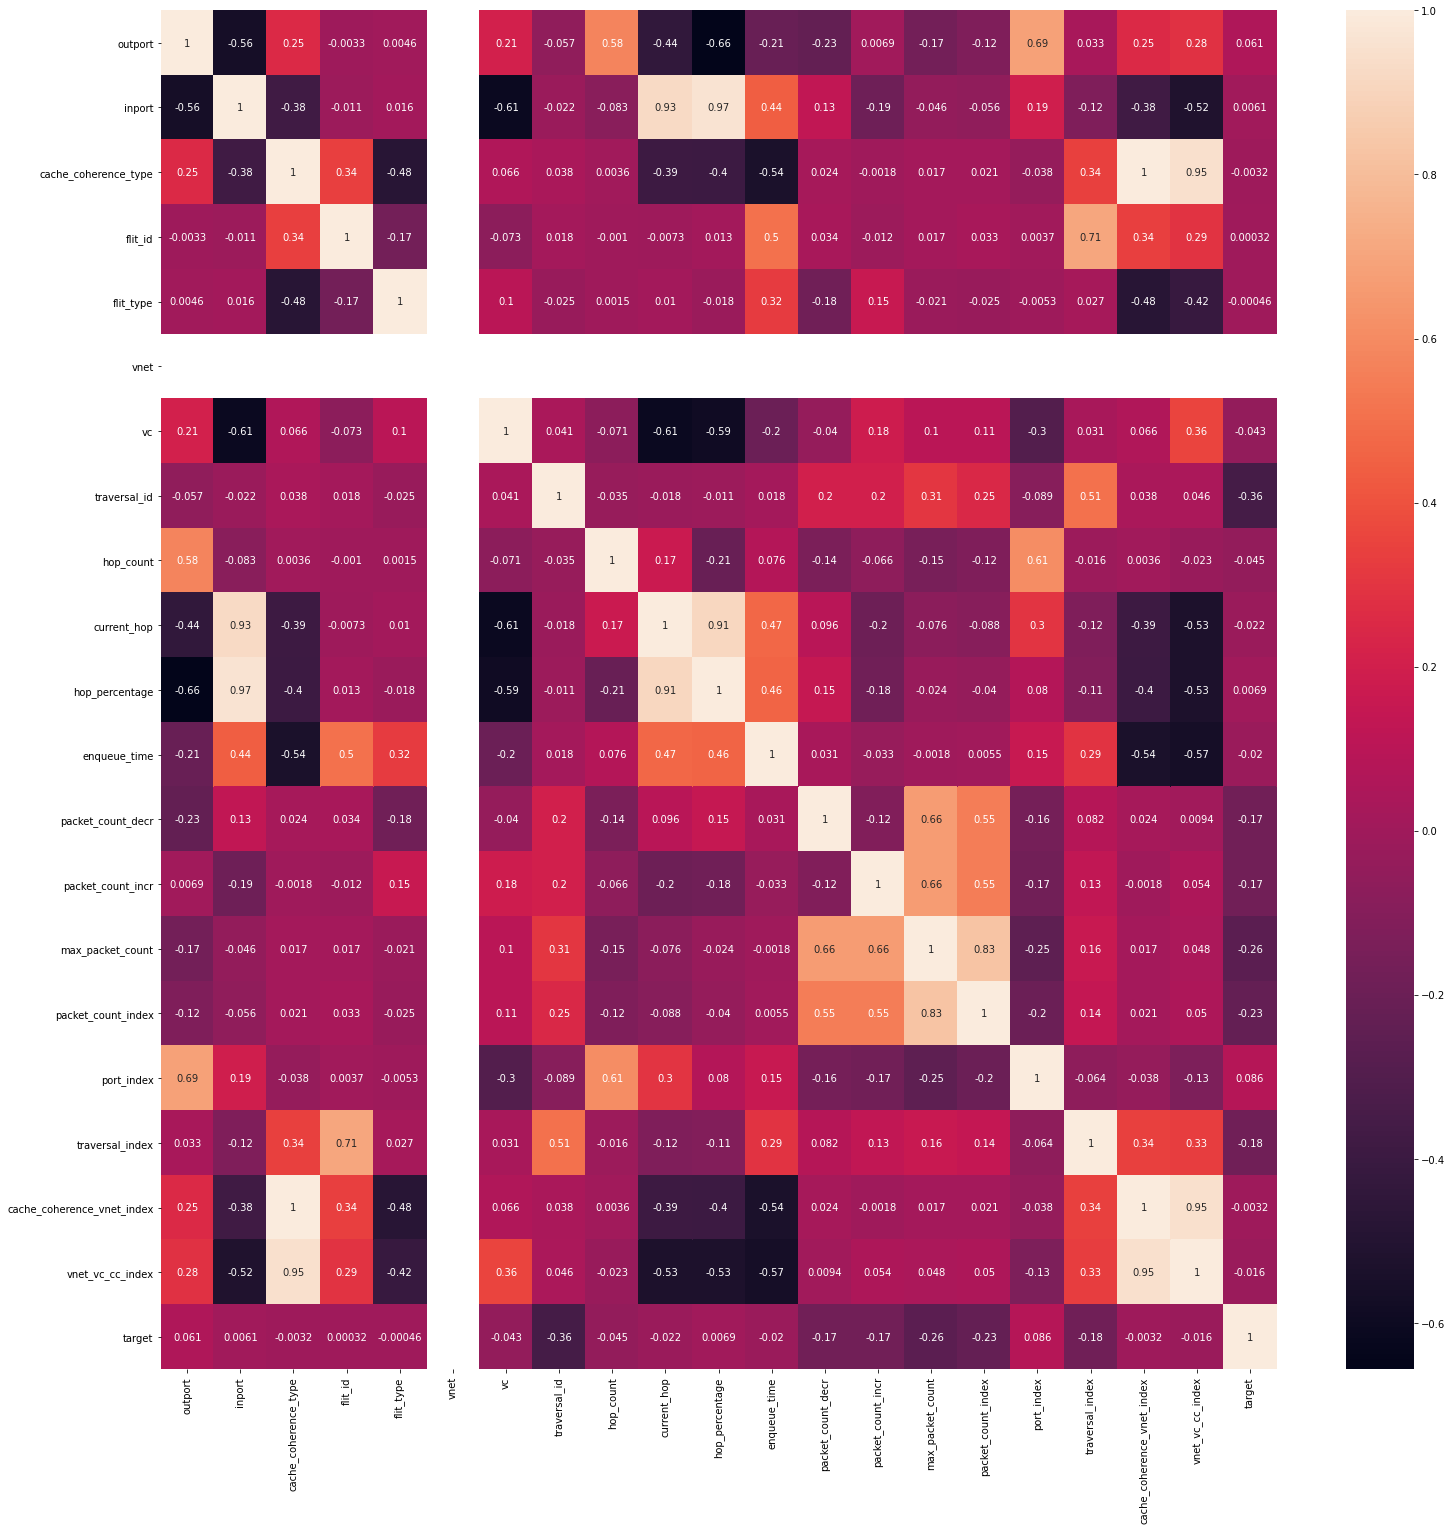

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['hop_percentage', 'inport', 'vnet_vc_cc_index', 'cache_coherence_type']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

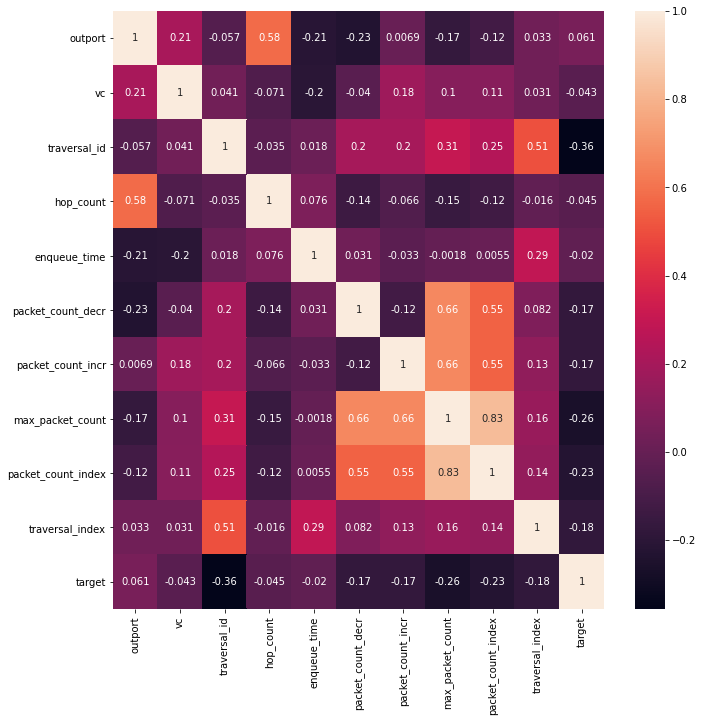

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

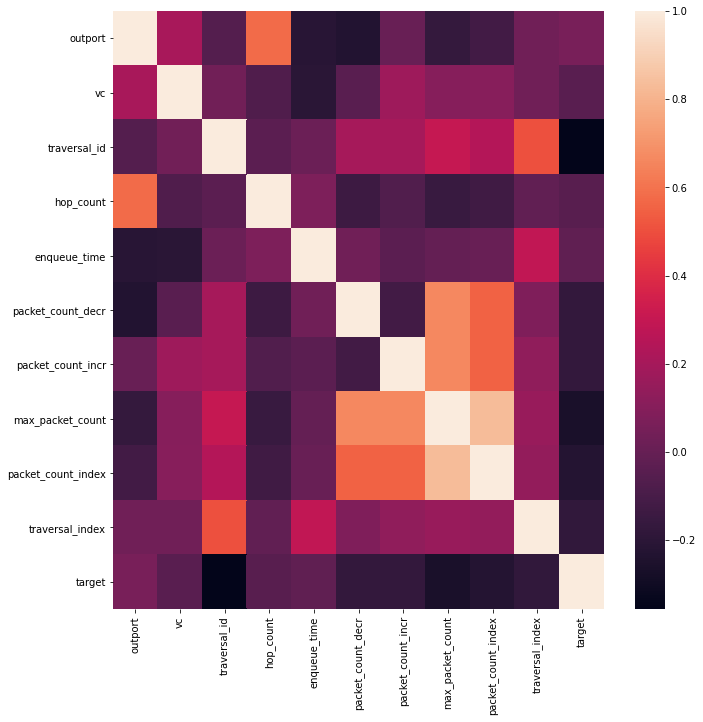

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.000000,0.000000,0.000000,0.50,0.214286,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.000000,0.000050,0.50,0.214286,0.000000,0.000000,0.000000,0.000000,0.000002
2,0.000000,0.000000,0.000997,0.50,0.285714,0.186275,0.000000,0.186275,0.007029,0.000044
3,0.000000,0.000000,0.000664,0.50,0.285714,0.127451,0.000000,0.127451,0.004809,0.000030
4,0.666667,0.000000,0.000997,0.50,0.000000,0.176471,0.009804,0.186275,0.013688,0.000093
...,...,...,...,...,...,...,...,...,...,...
51541,0.666667,0.333333,0.999983,0.50,0.375000,0.039216,0.088235,0.127451,0.018128,0.533331
51542,0.666667,0.333333,0.999983,0.50,0.500000,0.029412,0.098039,0.127451,0.015908,1.000000
51543,0.666667,0.666667,1.000000,0.50,0.500000,0.019608,0.107843,0.127451,0.012949,0.088886
51544,0.666667,1.000000,0.999983,0.25,0.017857,0.009804,0.117647,0.127451,0.009249,0.311108


In [20]:
train_X[train_X.duplicated()].shape

(2, 10)

In [21]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df3['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.666667,0.000,0.000000,0.833333,0.000000,0.300613,0.000000,0.300613,0.007201,0.000000
1,1.000000,0.000,0.000050,0.666667,0.146341,0.294479,0.006135,0.300613,0.014254,0.000002
2,0.000000,1.000,0.000000,0.833333,0.243902,0.288344,0.012270,0.300613,0.021014,0.000000
3,0.000000,1.000,0.000000,0.833333,0.256098,0.282209,0.018405,0.300613,0.027480,0.000011
4,0.000000,1.000,0.000000,0.833333,0.268293,0.276074,0.024540,0.300613,0.033652,0.000018
...,...,...,...,...,...,...,...,...,...,...
89970,0.666667,0.125,0.999983,0.666667,0.256098,0.024540,0.055215,0.079755,0.007201,0.533332
89971,0.666667,0.125,0.999983,0.666667,0.341463,0.018405,0.061350,0.079755,0.006319,1.000000
89972,0.666667,0.250,1.000000,0.666667,0.341463,0.012270,0.067485,0.079755,0.005143,0.088887
89973,0.666667,0.375,0.999983,0.500000,0.000000,0.006135,0.073620,0.079755,0.003674,0.311109


In [22]:
test_X1 = df4.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df4['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df5['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [24]:
test_X3 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df6['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [25]:
test_X4 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df7['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [27]:
train_Y = df['target']
train_Y.value_counts()

0    29713
1    21833
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs       Score
2        traversal_id  618.825537
7    max_packet_count  247.627508
8  packet_count_index  235.066535
9     traversal_index  214.271734
6   packet_count_incr  126.088913
5   packet_count_decr  121.552974
0             outport   43.657769
1                  vc   30.131605
3           hop_count    7.553055
4        enqueue_time    1.431989


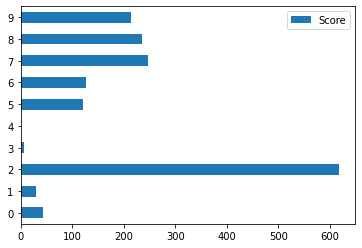

In [30]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [35]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.37845663819313
Test Prediction Score 97.11363235553465


In [36]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 74.43289802722978
Test Prediction Score 77.80765740024876
Test Prediction Score 76.0729100635016
Test Prediction Score 77.55191330394103
Test Prediction Score 75.56566117034879


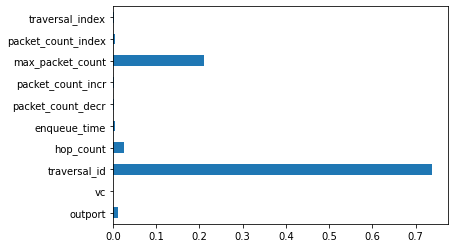

In [37]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

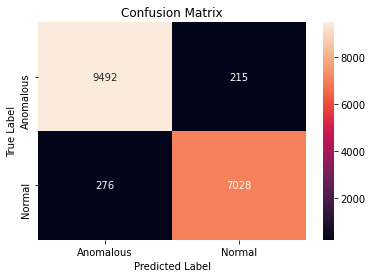

In [38]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9707
           1       0.97      0.96      0.97      7304

    accuracy                           0.97     17011
   macro avg       0.97      0.97      0.97     17011
weighted avg       0.97      0.97      0.97     17011



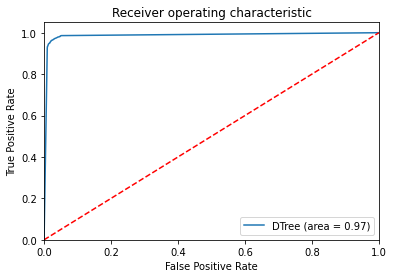

In [40]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [42]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r12l-i3.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [45]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99131316056175
Test Prediction Score 99.2181529598495


In [46]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 77.0402889691581
Test Prediction Score 79.43460284379307
Test Prediction Score 79.27245632180073
Test Prediction Score 79.38276175411436
Test Prediction Score 77.24791247401016


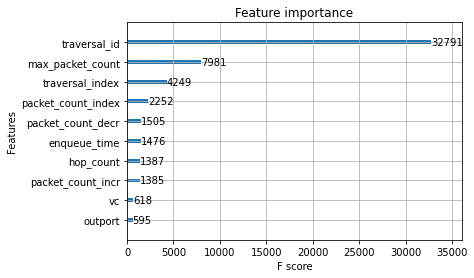

In [47]:
plot_importance(xgbc)
plt.show()

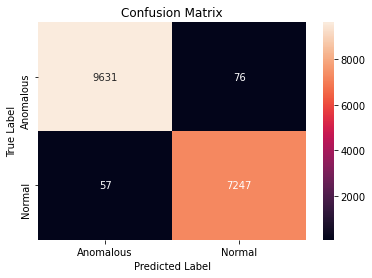

In [48]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [49]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9707
           1       0.99      0.99      0.99      7304

    accuracy                           0.99     17011
   macro avg       0.99      0.99      0.99     17011
weighted avg       0.99      0.99      0.99     17011



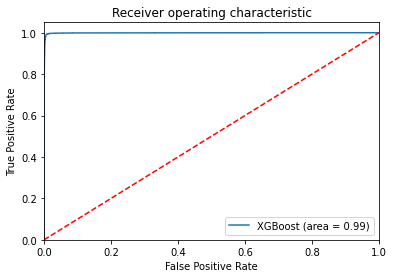

In [50]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()